In [1]:
import os
os.environ["TQDM_DISABLE"] = "1"

import tqdm
from tqdm import tqdm as tqdm_class

_original_init = tqdm_class.__init__
def _patched_init(self, *args, **kwargs):
    kwargs["disable"] = True
    _original_init(self, *args, **kwargs)
tqdm_class.__init__ = _patched_init
tqdm.tqdm = tqdm_class

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import warnings
import sys
import time
import logging
logging.getLogger("anomalib").setLevel(logging.ERROR)
warnings.filterwarnings('ignore')

from tqdm import tqdm
from pathlib import Path
from collections import Counter, defaultdict
from PIL import Image

In [2]:
try:
    import google.colab
    from google.colab import drive
    !uv pip install anomalib
    !uv pip install open-clip-torch
    drive.mount('/content/drive', force_remount=True)
    PROJECT_ROOT = Path('/content/drive/Othercomputers/Mac/multiModal_anomaly_report') # 본인 경로 수정: Mac/Window
except ImportError:
    PROJECT_ROOT = Path.cwd().parents[1]

os.chdir(PROJECT_ROOT) # 현재 경로 수정
print(f"Current working directory: {os.getcwd()}")

Using Python 3.12.12 environment at: /usr
Audited 1 package in 99ms
Using Python 3.12.12 environment at: /usr
Audited 1 package in 94ms
Mounted at /content/drive
Current working directory: /content/drive/Othercomputers/Mac/multiModal_anomaly_report


### Check config

In [3]:
# TODO: PATH 설정

# dataset path
DATA_ROOT = PROJECT_ROOT / "dataset" / "MMAD"

# config.yaml path
CONFIG_ROOT = PROJECT_ROOT / "configs"
ANOMALY_CONFIG_ROOT = CONFIG_ROOT / "anomaly.yaml"
EVAL_CONFIG_ROOT = CONFIG_ROOT / "eval.yaml"

# output path
OUTPUT_ROOT = PROJECT_ROOT / "output"

# check (선택사항)
print(f"Project Root: {PROJECT_ROOT}")
print(f"Data Root: {DATA_ROOT}")
print(f"Config Root: {ANOMALY_CONFIG_ROOT}")

Project Root: /content/drive/Othercomputers/Mac/multiModal_anomaly_report
Data Root: /content/drive/Othercomputers/Mac/multiModal_anomaly_report/dataset/MMAD
Config Root: /content/drive/Othercomputers/Mac/multiModal_anomaly_report/configs/anomaly.yaml


In [4]:
from src.utils import load_config

# tqdm bar off
os.environ["TQDM_DISABLE"] = "1"

# TODO: runtime_config.yaml 확장/수정
config = load_config(ANOMALY_CONFIG_ROOT)
config

{'data': {'root': 'dataset/MMAD',
  'output_root': './output',
  'image_size': [700, 700],
  'datasets': ['GoodsAD', 'MVTec-LOCO'],
  'categories': ['breakfast_box',
   'juice_bottle',
   'pushpins',
   'screw_bag',
   'cigarette_box',
   'drink_bottle',
   'drink_can',
   'food_bottle',
   'food_box',
   'food_package']},
 'anomaly': {'model': 'patchcore',
  'patchcore': {'backbone': None,
   'layers': None,
   'coreset_sampling_ratio': 0.05,
   'visualizer': False},
  'winclip': {'class_name': None, 'k_shot': None, 'scales': None},
  'efficientad': {'model_size': None,
   'teacher_out_channels': None,
   'visualizer': False,
   'evaluator': True,
   'imagenet_dir': 'imagenette/train'}},
 'predict': {'version': None},
 'training': {'resume': False,
  'train_batch_size': None,
  'eval_batch_size': None,
  'num_workers': 2,
  'max_epochs': None,
  'early_stopping': {'enabled': True, 'patience': 10, 'min_epochs': 10}},
 'engine': {'accelerator': 'auto',
  'enable_progress_bar': False,
  

### Train

In [5]:
from scripts.train_anomalib import Anomalibs

runner = Anomalibs() # default path: RUNTIME_CONFIG_ROOT
runner.fit_all()

Device: NVIDIA A100-SXM4-80GB
[patchcore] device: cuda, accelerator: auto, image_size: (700, 700)

[1/10] Training: GoodsAD/cigarette_box...


┏━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┓
┃   ┃ Name           ┃ Type           ┃ Params ┃ Mode  ┃ FLOPs ┃
┡━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━┩
│ 0 │ pre_processor  │ PreProcessor   │      0 │ train │     0 │
│ 1 │ post_processor │ PostProcessor  │      0 │ train │     0 │
│ 2 │ evaluator      │ Evaluator      │      0 │ train │     0 │
│ 3 │ model          │ PatchcoreModel │ 24.9 M │ train │     0 │
└───┴────────────────┴────────────────┴────────┴───────┴───────┘

Trainable params: 24.9 M                                                                                           
Non-trainable params: 0                                                                                            
Total params: 24.9 M                                                                                               
Total estimated model params size (MB): 99                                                                         
Modules in train mode: 19                                                                                          
Modules in eval mode: 174                                                                                          
Total FLOPs: 0

[Epoch 1/1]
✓ [1/10] GoodsAD/cigarette_box done (384.7s)

[2/10] Training: GoodsAD/drink_bottle...


┏━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┓
┃   ┃ Name           ┃ Type           ┃ Params ┃ Mode  ┃ FLOPs ┃
┡━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━┩
│ 0 │ pre_processor  │ PreProcessor   │      0 │ train │     0 │
│ 1 │ post_processor │ PostProcessor  │      0 │ train │     0 │
│ 2 │ evaluator      │ Evaluator      │      0 │ train │     0 │
│ 3 │ model          │ PatchcoreModel │ 24.9 M │ train │     0 │
└───┴────────────────┴────────────────┴────────┴───────┴───────┘

Trainable params: 24.9 M                                                                                           
Non-trainable params: 0                                                                                            
Total params: 24.9 M                                                                                               
Total estimated model params size (MB): 99                                                                         
Modules in train mode: 19                                                                                          
Modules in eval mode: 174                                                                                          
Total FLOPs: 0

[Epoch 1/1]
✓ [2/10] GoodsAD/drink_bottle done (5398.3s)

[3/10] Training: GoodsAD/drink_can...


┏━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┓
┃   ┃ Name           ┃ Type           ┃ Params ┃ Mode  ┃ FLOPs ┃
┡━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━┩
│ 0 │ pre_processor  │ PreProcessor   │      0 │ train │     0 │
│ 1 │ post_processor │ PostProcessor  │      0 │ train │     0 │
│ 2 │ evaluator      │ Evaluator      │      0 │ train │     0 │
│ 3 │ model          │ PatchcoreModel │ 24.9 M │ train │     0 │
└───┴────────────────┴────────────────┴────────┴───────┴───────┘

Trainable params: 24.9 M                                                                                           
Non-trainable params: 0                                                                                            
Total params: 24.9 M                                                                                               
Total estimated model params size (MB): 99                                                                         
Modules in train mode: 19                                                                                          
Modules in eval mode: 174                                                                                          
Total FLOPs: 0

[Epoch 1/1]
✓ [3/10] GoodsAD/drink_can done (721.7s)

[4/10] Training: GoodsAD/food_bottle...


┏━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┓
┃   ┃ Name           ┃ Type           ┃ Params ┃ Mode  ┃ FLOPs ┃
┡━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━┩
│ 0 │ pre_processor  │ PreProcessor   │      0 │ train │     0 │
│ 1 │ post_processor │ PostProcessor  │      0 │ train │     0 │
│ 2 │ evaluator      │ Evaluator      │      0 │ train │     0 │
│ 3 │ model          │ PatchcoreModel │ 24.9 M │ train │     0 │
└───┴────────────────┴────────────────┴────────┴───────┴───────┘

Trainable params: 24.9 M                                                                                           
Non-trainable params: 0                                                                                            
Total params: 24.9 M                                                                                               
Total estimated model params size (MB): 99                                                                         
Modules in train mode: 19                                                                                          
Modules in eval mode: 174                                                                                          
Total FLOPs: 0

OutOfMemoryError: CUDA out of memory. Tried to allocate 44.93 GiB. GPU 0 has a total capacity of 79.25 GiB of which 33.09 GiB is free. Including non-PyTorch memory, this process has 46.15 GiB memory in use. Of the allocated memory 45.65 GiB is allocated by PyTorch, and 12.96 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

### Predict

In [ ]:
from scripts.train_anomalib import Anomalibs
from src.eval.metrics import compute_anomaly_metrics

runner = Anomalibs() # default path: RUNTIME_CONFIG_ROOT
predictions = runner.predict_all()
# [attr for attr in dir(list(predictions.values())[0][0]) if not attr.startswith('_')]
metrics_224 = compute_anomaly_metrics(predictions)
metrics_224

Device: Tesla T4
[patchcore] device: cuda, accelerator: auto

[1/10] Predicting: GoodsAD/cigarette_box...
✓ [1/10] GoodsAD/cigarette_box done (inference: 18.38s, 42.9ms/img)

[2/10] Predicting: GoodsAD/drink_bottle...
✓ [2/10] GoodsAD/drink_bottle done (inference: 66.54s, 85.2ms/img)

[3/10] Predicting: GoodsAD/drink_can...
✓ [3/10] GoodsAD/drink_can done (inference: 13.02s, 44.4ms/img)

[4/10] Predicting: GoodsAD/food_bottle...
✓ [4/10] GoodsAD/food_bottle done (inference: 67.88s, 112.4ms/img)

[5/10] Predicting: GoodsAD/food_box...
✓ [5/10] GoodsAD/food_box done (inference: 22.29s, 56.1ms/img)

[6/10] Predicting: GoodsAD/food_package...
✓ [6/10] GoodsAD/food_package done (inference: 30.40s, 62.9ms/img)

[7/10] Predicting: MVTec-LOCO/breakfast_box...
✓ [7/10] MVTec-LOCO/breakfast_box done (inference: 11.75s, 42.7ms/img)

[8/10] Predicting: MVTec-LOCO/juice_bottle...
✓ [8/10] MVTec-LOCO/juice_bottle done (inference: 14.75s, 44.7ms/img)

[9/10] Predicting: MVTec-LOCO/pushpins...
✓ [9/10

,Image_AUROC,Pixel_AUROC,PRO,Dice,IoU,N_samples
Category,,,,,,
GoodsAD/cigarette_box,0.9913,0.9878,0.9386,0.6980,0.5361,429.0
GoodsAD/drink_bottle,0.8424,0.9921,0.8582,0.6288,0.4585,781.0
GoodsAD/drink_can,0.9264,0.9692,0.8515,0.5787,0.4072,293.0
GoodsAD/food_bottle,0.8969,0.9885,0.8497,0.5956,0.4241,604.0
GoodsAD/food_box,0.7648,0.9734,0.6932,0.3395,0.2044,397.0
GoodsAD/food_package,0.7442,0.9779,0.7997,0.4210,0.2666,483.0
MVTec-LOCO/breakfast_box,0.8736,0.9141,0.7727,0.5833,0.4118,275.0
MVTec-LOCO/juice_bottle,0.9456,0.9123,0.8202,0.5944,0.4229,330.0
MVTec-LOCO/pushpins,0.7649,0.6353,0.5620,0.0729,0.0378,310.0


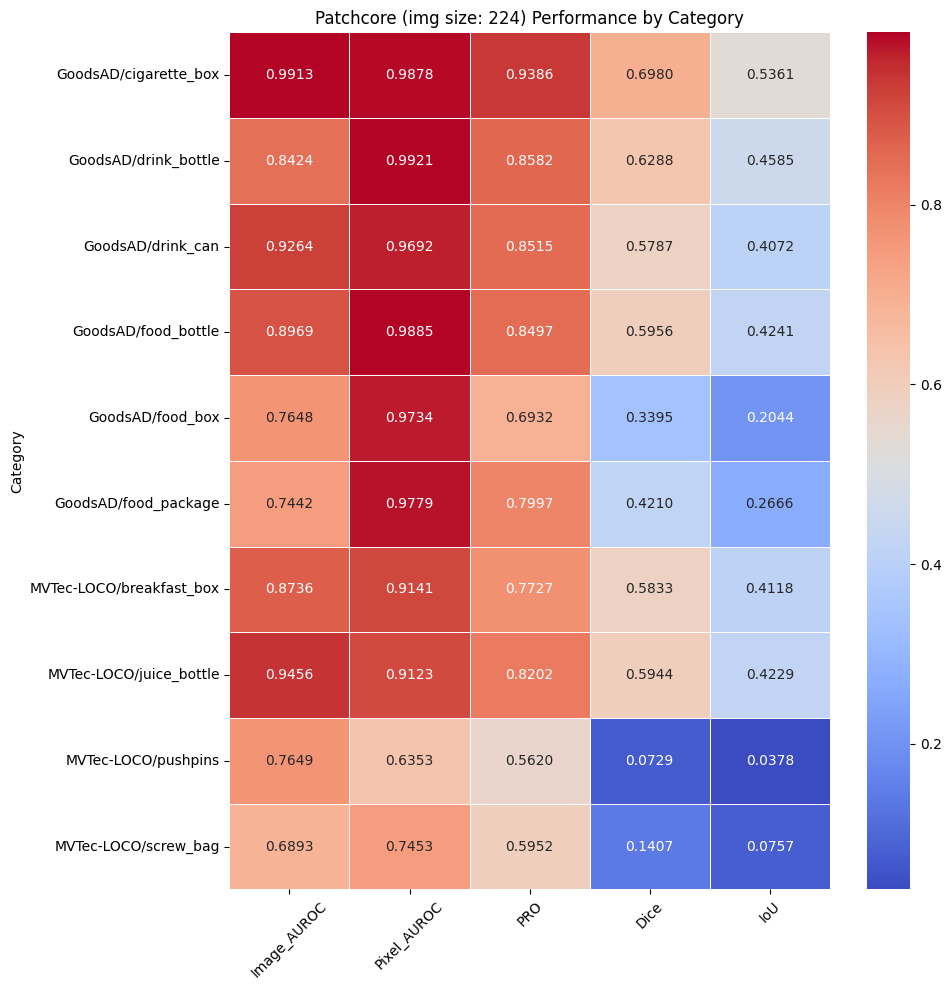

<Axes: title={'center': 'Patchcore (img size: 224) Performance by Category'}, ylabel='Category'>

In [ ]:
from src.visual.plot import heatmap_plot

metrics_trans = metrics_224.drop('Average').drop(columns=['N_samples'])
heatmap_plot(
    metrics_trans,
    figsize=(10, 10),
    cmap='coolwarm',
    annot=True,
    fmt='.4f',
    linewidths=0.5,
    title='Patchcore (img size: 224) Performance by Category',
    rotation_x=45,
    rotation_y=0
)

In [ ]:
from scripts.train_anomalib import Anomalibs
from src.visual.plot import visualize_predictions_from_runner

runner = Anomalibs()
results = visualize_predictions_from_runner(
    runner,
    n_samples_per_category=1,
    filter_by="anomaly",      # "all", "anomaly", "normal"
    random_sample=True,       # 랜덤 샘플링
    show_inference_time=True,
)

Output hidden; open in https://colab.research.google.com to view.

### Image size 700

In [ ]:
# check
config['data'], config['predict']

({'root': 'dataset/MMAD',
  'output_root': './output',
  'image_size': [224, 224],
  'datasets': ['GoodsAD', 'MVTec-LOCO'],
  'categories': ['breakfast_box',
   'juice_bottle',
   'pushpins',
   'screw_bag',
   'cigarette_box',
   'drink_bottle',
   'drink_can',
   'food_bottle',
   'food_box',
   'food_package']},
 {'version': 2})

In [ ]:
from scripts.train_anomalib import Anomalibs
from src.datasets.dataloader import MMADLoader
from src.eval.metrics import compute_anomaly_metrics

runner = Anomalibs() # default path: RUNTIME_CONFIG_ROOT
runner.config['data']['image_size'] = [700, 700]
runner.config['predict']['version'] = 1
runner.loader = MMADLoader(config=runner.config, model_name=runner.model_name)
predictions = runner.predict_all()
# [attr for attr in dir(list(predictions.values())[0][0]) if not attr.startswith('_')]
metrics_700 = compute_anomaly_metrics(predictions)
metrics_700

Device: Tesla T4
[patchcore] device: cuda, accelerator: auto

[1/10] Predicting: GoodsAD/cigarette_box...
✓ [1/10] GoodsAD/cigarette_box done (inference: 13.00s, 30.3ms/img)

[2/10] Predicting: GoodsAD/drink_bottle...
✓ [2/10] GoodsAD/drink_bottle done (inference: 34.85s, 44.6ms/img)

[3/10] Predicting: GoodsAD/drink_can...
✓ [3/10] GoodsAD/drink_can done (inference: 10.00s, 34.1ms/img)

[4/10] Predicting: GoodsAD/food_bottle...
✓ [4/10] GoodsAD/food_bottle done (inference: 34.93s, 57.8ms/img)

[5/10] Predicting: GoodsAD/food_box...
✓ [5/10] GoodsAD/food_box done (inference: 17.57s, 44.3ms/img)

[6/10] Predicting: GoodsAD/food_package...
✓ [6/10] GoodsAD/food_package done (inference: 22.23s, 46.0ms/img)

[7/10] Predicting: MVTec-LOCO/breakfast_box...
✓ [7/10] MVTec-LOCO/breakfast_box done (inference: 8.81s, 32.1ms/img)

[8/10] Predicting: MVTec-LOCO/juice_bottle...
✓ [8/10] MVTec-LOCO/juice_bottle done (inference: 8.18s, 24.8ms/img)

[9/10] Predicting: MVTec-LOCO/pushpins...
✓ [9/10] M

In [ ]:
import re

img_224_log_path = "logs/inference_anomalib_20260210_164315.log"
img_700_log_path = "logs/inference_anomalib_20260210_174344.log"
pattern = r"\[(\d+)/(\d+)\]\s+(\S+)/(\S+)\s+done\s+\(inference:\s+([\d.]+)s,\s+([\d.]+)ms/img\)"

def parse_inference_log(log_path, version_label):
      with open(log_path) as f:
          text = f.read()
      matches = re.findall(pattern, text)
      df = pd.DataFrame(matches, columns=["idx", "total", "dataset", "category", "inference_sec", "ms_per_img"])
      df["inference_sec"] = df["inference_sec"].astype(float)
      df["ms_per_img"] = df["ms_per_img"].astype(float)
      df["image_size"] = version_label
      df = df.drop(columns=["idx", "total"])
      return df

latency_224 = parse_inference_log(img_224_log_path, "224x224")
latency_700 = parse_inference_log(img_700_log_path, "700x700")
latency_df = pd.concat([latency_224, latency_700], ignore_index=True)
latency_df

,dataset,category,inference_sec,ms_per_img,image_size
0,GoodsAD,cigarette_box,18.38,42.9,224x224
1,GoodsAD,drink_bottle,66.54,85.2,224x224
2,GoodsAD,drink_can,13.02,44.4,224x224
3,GoodsAD,food_bottle,67.88,112.4,224x224
4,GoodsAD,food_box,22.29,56.1,224x224
5,GoodsAD,food_package,30.40,62.9,224x224
6,MVTec-LOCO,breakfast_box,11.75,42.7,224x224
7,MVTec-LOCO,juice_bottle,14.75,44.7,224x224
8,MVTec-LOCO,pushpins,14.30,46.1,224x224
9,MVTec-LOCO,screw_bag,15.66,45.9,224x224


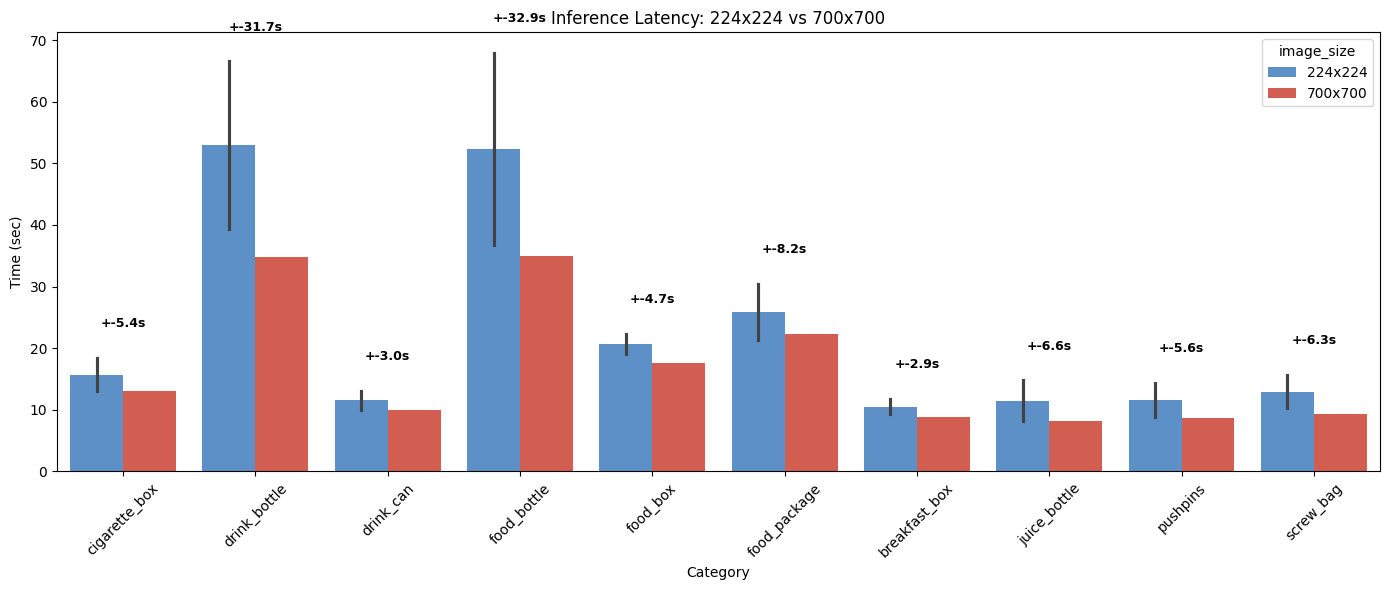

In [ ]:
from src.visual.plot import bar_plot

ax = bar_plot(
    latency_df,
    x_col="category",
    y_col="inference_sec",
    hue="image_size",
    palette=["#4A90D9", "#E74C3C"],
    rotation=45,
    title="Inference Latency: 224x224 vs 700x700",
    xlabel="Category",
    ylabel="Time (sec)",
    figsize=(14, 6),
    show=False,
)

categories = latency_df["category"].unique()
for i, cat in enumerate(categories):
    t224 = latency_df[(latency_df["category"] == cat) & (latency_df["image_size"] == "224x224")]["inference_sec"].values[0]
    t700 = latency_df[(latency_df["category"] == cat) & (latency_df["image_size"] == "700x700")]["inference_sec"].values[0]
    diff = t700 - t224
    ax.text(i, max(t224, t700) + 5, f"+{diff:.1f}s", ha="center", fontsize=9, color="black",
fontweight="bold")

plt.tight_layout()
plt.show()

### Metric

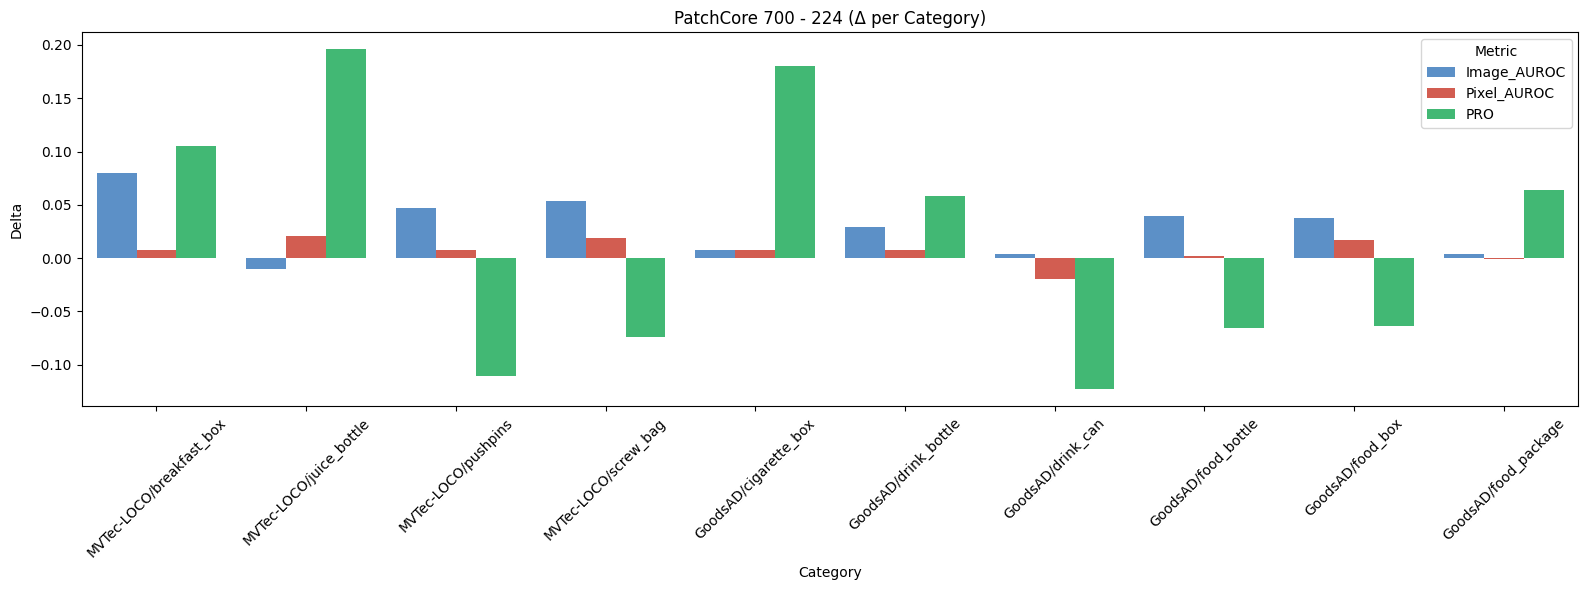

<Axes: title={'center': 'PatchCore 700 - 224 (Δ per Category)'}, xlabel='Category', ylabel='Delta'>

In [ ]:
from src.visual.plot import bar_plot

df_delta = df_700.set_index("Category")[["Image_AUROC", "Pixel_AUROC", "PRO"]] - df_224.set_index("Category")[["Image_AUROC", "Pixel_AUROC", "PRO"]]
df_delta = df_delta.reset_index()
df_delta_melted = df_delta.melt(id_vars="Category", var_name="Metric", value_name="Delta")

bar_plot(
    df_delta_melted,
    x_col="Category",
    y_col="Delta",
    hue="Metric",
    palette=["#4A90D9", "#E74C3C", "#2ECC71"],
    rotation=45,
    title="PatchCore 700 - 224 (Δ per Category)",
    xlabel="Category",
    ylabel="Delta",
    figsize=(16, 6),
)

### latency (GPU: T4)

In [ ]:
from src.utils import load_config, load_json, load_csv

# tqdm bar off
os.environ["TQDM_DISABLE"] = "1"

# load config (img size: 224,244)
config = load_config(RUNTIME_CONFIG_ROOT)
config

{'data': {'root': 'dataset/MMAD',
  'output_root': './output',
  'image_size': [224, 224],
  'datasets': ['GoodsAD', 'MVTec-LOCO'],
  'categories': ['breakfast_box',
   'juice_bottle',
   'pushpins',
   'screw_bag',
   'cigarette_box',
   'drink_bottle',
   'drink_can',
   'food_bottle',
   'food_box',
   'food_package']},
 'anomaly': {'model': 'patchcore',
  'patchcore': {'backbone': None,
   'layers': None,
   'coreset_sampling_ratio': None,
   'visualizer': False},
  'winclip': {'class_name': None, 'k_shot': None, 'scales': None},
  'efficientad': {'model_size': None,
   'teacher_out_channels': None,
   'visualizer': False,
   'evaluator': True,
   'imagenet_dir': 'imagenette/train'}},
 'predict': {'version': 0},
 'training': {'resume': False,
  'train_batch_size': None,
  'eval_batch_size': None,
  'num_workers': 0,
  'max_epochs': None,
  'early_stopping': {'enabled': True, 'patience': 10, 'min_epochs': 10}},
 'engine': {'accelerator': 'auto',
  'enable_progress_bar': False,
  'lo

In [ ]:
from scripts.train_anomalib import Anomalibs
from src.eval.metrics import compute_anomaly_metrics

runner = Anomalibs() # default path: RUNTIME_CONFIG_ROOT
predictions = runner.predict_all()
img_224_metrics = compute_anomaly_metrics(predictions)
img_224_metrics

Device: Tesla T4
[patchcore] device: cuda, accelerator: auto

[1/10] Predicting: GoodsAD/cigarette_box...
✓ [1/10] GoodsAD/cigarette_box done (318.9s, inference: 16.1s)

[2/10] Predicting: GoodsAD/drink_bottle...
✓ [2/10] GoodsAD/drink_bottle done (1216.2s, inference: 71.9s)

[3/10] Predicting: GoodsAD/drink_can...
✓ [3/10] GoodsAD/drink_can done (426.4s, inference: 12.4s)

[4/10] Predicting: GoodsAD/food_bottle...
✓ [4/10] GoodsAD/food_bottle done (929.3s, inference: 64.0s)

[5/10] Predicting: GoodsAD/food_box...
✓ [5/10] GoodsAD/food_box done (605.7s, inference: 25.5s)

[6/10] Predicting: GoodsAD/food_package...
✓ [6/10] GoodsAD/food_package done (718.7s, inference: 37.1s)

[7/10] Predicting: MVTec-LOCO/breakfast_box...
✓ [7/10] MVTec-LOCO/breakfast_box done (386.2s, inference: 15.1s)

[8/10] Predicting: MVTec-LOCO/juice_bottle...
✓ [8/10] MVTec-LOCO/juice_bottle done (504.0s, inference: 17.8s)

[9/10] Predicting: MVTec-LOCO/pushpins...


KeyboardInterrupt: 

In [ ]:
# update img size (700,700)
config['data']['image_size'] = [700, 700]
config['predict']['version'] = 1
config[['data', 'predict']] # check